![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

As this is a new venture for Microsoft, we want to be cognizant of cost and profitability. We offer several, data-driven approaches to maximize return.

Questions we'll answer:

***
* What genres of movies are lower risk to target as an entry point into the industry?
* Are there types of movies or specific directors and actors that yield higher revenues?
    * Does Microsoft have a catalogue of such content at their disposal?
* When is the most profitable time to release movies?
* Who are Microsoft's competitors and can anything be learned from their releases?

***

## Data 


Questions to consider:
* Compare individual studio profits(total gross, domestic gross, foreign gross amongst each other and see what can be found.
* Use the data to reccomend what can Microsoft due to become a top earner like the top grossers.
* Sourced from [Box Office Mojo](https://www.boxofficemojo.com/)
***

# Topic 3: Keeping up With the Competition

## 3.1 Data Import

Look for dataset that includes studio name, total gross, foreign & domestic gross and import it

In [13]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [14]:
grossdf = pd.read_csv('./data/zippedData/bom.movie_gross.csv.gz')

In [15]:
grossdf

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


## 3.2 Data Cleaning & Filtering

We have to start by cleaning up null values, converting data types if needed to make sorting work. We created a new "gross_total" column for the analysis and visualization. Last we created a Top 50 list sorted by studios for analysis.

In [16]:
grossdf.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [18]:
grossdf.shape

(3387, 5)

In [19]:
#this shows there are no missing values bc of nonnull
#may have to convert some dtypes tho for sorting
grossdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [23]:
grossdf.foreign_gross = grossdf.foreign_gross.str.replace(",","")
grossdf.foreign_gross

0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3382          NaN
3383          NaN
3384          NaN
3385          NaN
3386          NaN
Name: foreign_gross, Length: 3387, dtype: object

In [24]:
#get rid of all NaN values
grossdf.foreign_gross = grossdf.foreign_gross.fillna(0)
grossdf.foreign_gross

0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3382            0
3383            0
3384            0
3385            0
3386            0
Name: foreign_gross, Length: 3387, dtype: object

In [25]:
#convert object to float
grossdf.foreign_gross = grossdf.foreign_gross.astype(float)
grossdf.foreign_gross

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382            0.0
3383            0.0
3384            0.0
3385            0.0
3386            0.0
Name: foreign_gross, Length: 3387, dtype: float64

In [26]:
#make a new column called gross_total
gross_total = grossdf.domestic_gross + grossdf.foreign_gross
gross_total

0       1.067000e+09
1       1.025500e+09
2       9.603000e+08
3       8.283000e+08
4       7.526000e+08
            ...     
3382    6.200000e+03
3383    4.800000e+03
3384    2.500000e+03
3385    2.400000e+03
3386    1.700000e+03
Length: 3387, dtype: float64

In [27]:
grossdf

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018
3384,El Pacto,Sony,2500.0,0.0,2018
3385,The Swan,Synergetic,2400.0,0.0,2018


In [29]:
#start cleaning data
#take only relevant topics for your analysis, drop title and year
#add new column, total gross
top_50 = {"studio" : grossdf["studio"],
                    "domestic_gross" : grossdf["domestic_gross"],
                    "foreign_gross" : grossdf["foreign_gross"],
                    "gross_total" : gross_total}
top_50 = pd.DataFrame(top_50)
top_50 


,studio,domestic_gross,foreign_gross,gross_total
0,BV,415000000.0,652000000.0,1.067000e+09
1,BV,334200000.0,691300000.0,1.025500e+09
2,WB,296000000.0,664300000.0,9.603000e+08
3,WB,292600000.0,535700000.0,8.283000e+08
4,P/DW,238700000.0,513900000.0,7.526000e+08
...,...,...,...,...
3382,Magn.,6200.0,0.0,6.200000e+03
3383,FM,4800.0,0.0,4.800000e+03
3384,Sony,2500.0,0.0,2.500000e+03
3385,Synergetic,2400.0,0.0,2.400000e+03


In [30]:
#drop na values to clean some rows
top_50 = top_50.dropna(axis=0, how='any', thresh=None, subset=["studio"], inplace=False)
top_50

,studio,domestic_gross,foreign_gross,gross_total
0,BV,415000000.0,652000000.0,1.067000e+09
1,BV,334200000.0,691300000.0,1.025500e+09
2,WB,296000000.0,664300000.0,9.603000e+08
3,WB,292600000.0,535700000.0,8.283000e+08
4,P/DW,238700000.0,513900000.0,7.526000e+08
...,...,...,...,...
3382,Magn.,6200.0,0.0,6.200000e+03
3383,FM,4800.0,0.0,4.800000e+03
3384,Sony,2500.0,0.0,2.500000e+03
3385,Synergetic,2400.0,0.0,2.400000e+03


In [31]:
top_50['studio'].value_counts()

IFC      166
Uni.     147
WB       140
Magn.    136
Fox      136
        ... 
FInd.      1
KKM        1
DR         1
Part.      1
PDF        1
Name: studio, Length: 257, dtype: int64

## 3.3 Data Analysis & Calculations

We filter the new list down even more by highest grossing studios out of the top 50. Then we filtered down to two more tables of domestic gross vs studio and foreign gross vs studio.

In [33]:
#group domestic + foreign together so you can ascend both at same time
t_top_50 = top_50.sort_values("gross_total", ascending=False).head(50)
t_top_50

,studio,domestic_gross,foreign_gross,gross_total
727,BV,623400000.0,895500000.0,1.518900e+09
1875,BV,459000000.0,946400000.0,1.405400e+09
3080,BV,700100000.0,646900000.0,1.347000e+09
328,WB,381000000.0,960500000.0,1.341500e+09
2758,BV,620200000.0,712400000.0,1.332600e+09
3081,Uni.,417700000.0,891800000.0,1.309500e+09
1127,BV,400700000.0,875700000.0,1.276400e+09
2759,BV,504000000.0,759500000.0,1.263500e+09
3082,BV,608600000.0,634200000.0,1.242800e+09
1128,BV,409000000.0,805800000.0,1.214800e+09


In [34]:
t_top_50.describe()

,domestic_gross,foreign_gross,gross_total
count,5.000000e+01,5.000000e+01,5.000000e+01
mean,3.656120e+08,6.643880e+08,1.030000e+09
std,1.528027e+08,1.656287e+08,1.823695e+08
min,2.700000e+06,1.131600e+03,7.949000e+08
25%,2.715250e+08,5.489000e+08,8.741500e+08
50%,3.468500e+08,6.724500e+08,9.959500e+08
75%,4.144000e+08,7.711000e+08,1.141800e+09
max,9.367000e+08,9.605000e+08,1.518900e+09


In [35]:
#made a groupby to sort total gross by studios to come up with a specific number for each studio in top 50
#also do this twice for the second graph for domestic + foreign gross
studiosum = t_top_50.groupby(["studio"])[["gross_total"]].sum().sort_values(by="gross_total", ascending = False)
studiosum

,gross_total
studio,
BV,2.408190e+10
WB,7.872400e+09
Uni.,5.350000e+09
Sony,4.686600e+09
WB (NL),2.935500e+09
Fox,1.780800e+09
P/DW,1.123800e+09
Par.,1.104000e+09
HC,8.703000e+08


In [36]:
domesticsum = t_top_50.groupby(["studio"])[["domestic_gross"]].sum()
domesticsum

,domestic_gross
studio,
BV,9.827600e+09
Fox,3.777000e+08
HC,2.700000e+06
LG/S,2.923000e+08
LGF,4.247000e+08
P/DW,3.524000e+08
Par.,2.454000e+08
Sony,1.456700e+09
Uni.,1.754800e+09


In [37]:
foreignsum = t_top_50.groupby(["studio"])[["foreign_gross"]].sum()
foreignsum

,foreign_gross
studio,
BV,1.425430e+10
Fox,1.403100e+09
HC,8.676000e+08
LG/S,5.374000e+08
LGF,4.403000e+08
P/DW,7.714000e+08
Par.,8.586000e+08
Sony,3.229900e+09
Uni.,3.595200e+09


In [419]:
#have made 2 seperate tables of foreign and domestic gross by studio
#converted foreign_gross column to float type instead of object for sorting purposes

## 3.4 Data Visualization
We plot each studio based on how much total box office they made in the top 50. Another bar graph compared the breakdown between foreign and domestic gross of each studio in the top 50 to see if there was any correlation between them.

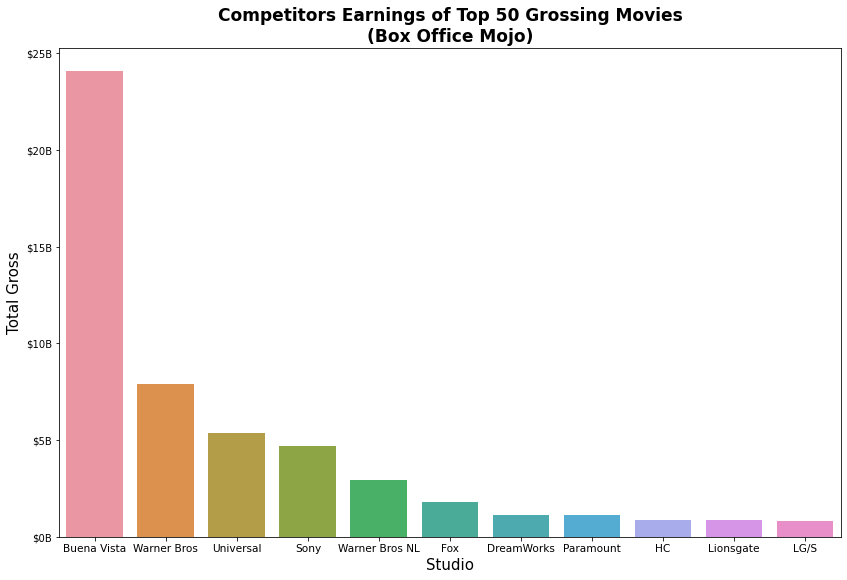

In [41]:
#changed millions from billions in custom ticker, adjust the le-# to one that matches with my totals.
#increase size of graph, titles, labels, and tickers
#make it in descending order so you can easily it more clearly
from matplotlib.ticker import FuncFormatter

studio_labels = ['Buena Vista', 'Warner Bros', 'Universal', 'Sony', 'Warner Bros NL', 'Fox', 'DreamWorks', 'Paramount', 'HC', 'Lionsgate', 'LG/S']
x_sume = np.arange(len(studio_labels))
def billions(y, pos):
    return '$%1.0fB' % (y*1e-9)
sumedhstudiofig, ax = plt.subplots(figsize=(14,9))
sns.barplot(x = studiosum.index, y = studiosum['gross_total'])
sns.color_palette("cubehelix", as_cmap=True)


formatter = FuncFormatter(billions)
ax.yaxis.set_major_formatter(formatter)

ax.set_title('Competitors Earnings of Top 50 Grossing Movies\n(Box Office Mojo)', fontsize=17, weight=950)
ax.set_xlabel('Studio', fontsize=15)
ax.set_ylabel('Total Gross', fontsize=15)
ax.set_xticks(x_sume)
ax.set_xticklabels(studio_labels, size=13)
plt.xticks(fontsize=10.5)
plt.yticks(fontsize=10);

plt.savefig('sumedhstudiofig4.jpg', dpi=300, bbox_inches='tight')



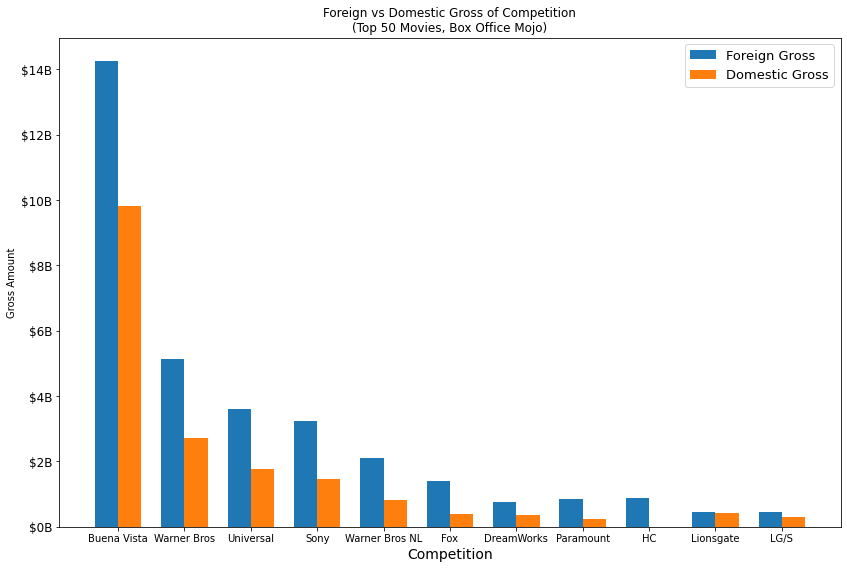

In [40]:
#do a double bar chart for domestic vs foreign total sales for each studio in top 50 movies

studio_labels = ['Buena Vista', 'Warner Bros', 'Universal', 'Sony', 'Warner Bros NL', 'Fox', 'DreamWorks', 'Paramount', 'HC', 'Lionsgate', 'LG/S']
foreignsum = [1.425430e+10, 5.142600e+09, 3.595200e+09, 3.229900e+09, 2.119000e+09, 1.403100e+09, 7.714000e+08, 8.586000e+08, 8.676000e+08, 4.403000e+08, 4.403000e+08]
domesticsum = [9.827600e+09, 2.729800e+09, 1.754800e+09, 1.456700e+09, 8.165000e+08, 3.777000e+08, 3.524000e+08, 2.454000e+08,  2.700000e+06, 4.247000e+08, 2.923000e+08]

x_sume = np.arange(len(studio_labels))
width_sum = 0.35
def billions(y, pos):
    return '$%1.0fB' % (y*1e-9)
formatter = FuncFormatter(billions)


fvsdfig, ax = plt.subplots(figsize=(14,9))
rects1_sum = ax.bar(x_sume - width_sum/2, foreignsum, width_sum, label='Foreign Gross')
rects2_sum = ax.bar(x_sume + width_sum/2, domesticsum, width_sum, label='Domestic Gross')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('Competition', size=14)
ax.set_ylabel('Gross Amount')
ax.set_title('Foreign vs Domestic Gross of Competition\n(Top 50 Movies, Box Office Mojo)')
ax.set_xticks(x_sume)
ax.set_xticklabels(studio_labels, size=10)
ax.legend()
plt.rc('legend', fontsize=13)
plt.yticks(fontsize=12)

plt.savefig('fvsdfig.jpg', dpi=300, bbox_inches='tight')




plt.show()

## 3.5 Reccomendations


Based on these results, the top two earners are Buena Vista(Disney) & Warner Bros. These two studios are
home to the biggest comic book franchises, Marvel & DC which is a reason why there are so incredibly sucessfull internationally and domestically. Our suggestion for Microsoft would be to see these comapny models and  to look into 
converting its own video game exclusives such as Halo & Forza into movies to potentially reach the same succcess as the current two. 


## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***